In [84]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")
mode="offline"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# PATHS
# if platform.system() == "Windows":
#     FIGURES_PATH = Path(
#         "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
#     )
#     DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
# else:
#     FIGURES_PATH = Path(
#         "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
#     )
#     DATA_PATH = Path(
#         "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
#     )

FPATH = "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/offline/cpoke_dur_debug"

# ANIMALS
ANIMAL_ID = ["R015"]
ANIMAL_IDS = ["R013", "R014", "R015", "R512", "R513"]

# DATES
date_min = "2023-08-04"
date_max = "2023-08-04"

if mode == "online":
    from create_trials_df import create_trials_df_from_dj
    from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

    trials_df = create_trials_df_from_dj(
        animal_ids=ANIMAL_ID, date_min=date_min, date_max=date_max
    )
    TRIALS = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min="2023-08-01")
else:
    trials_df = pd.read_csv(FPATH + "/r015.csv")
    TRIALS = pd.read_csv(FPATH + "/all_cpokes.csv")

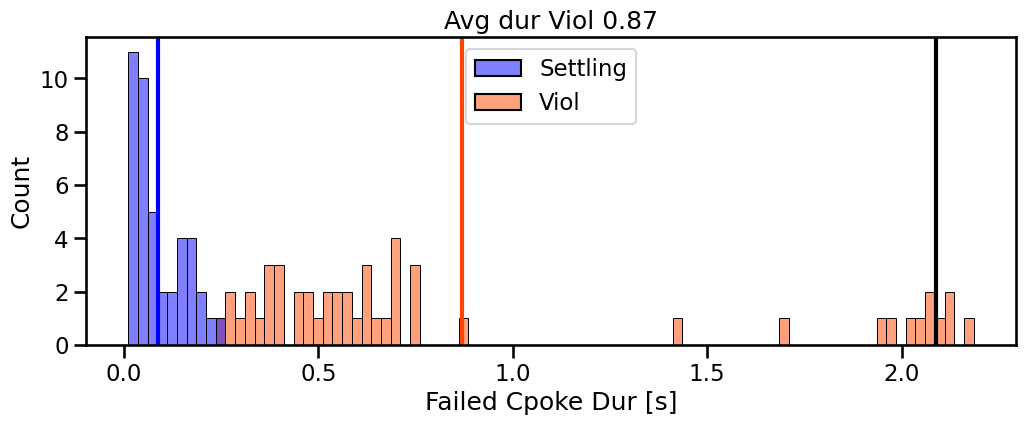

In [86]:
fig, ax = pu.make_fig()
plot_avg_failed_cpoke_dur(trials_df, ax, mode="violations")

In [87]:
v_df[v_df.cpoke_dur < v_df.pre_go_dur].trial

1        2
2        3
3        4
4        5
6        7
7        8
9       10
17      18
18      19
19      20
21      22
23      24
25      26
26      27
30      31
31      32
32      33
35      36
38      39
42      43
43      44
44      45
45      46
53      54
86      87
94      95
95      96
99     100
109    110
110    111
128    129
143    144
148    149
163    164
166    167
167    168
171    172
172    173
186    187
188    189
194    195
195    196
205    206
207    208
Name: trial, dtype: uint64[pyarrow]

In [88]:
v_df = trials_df.query("violations == 1").copy()
(v_df.cpoke_dur > v_df.pre_go_dur).sum()

6

In [89]:
v_df[v_df.cpoke_dur > v_df.pre_go_dur][["trial", "cpoke_dur", "pre_go_dur"]]

,trial,cpoke_dur,pre_go_dur
11,12,2.1277,2.06
22,23,2.1303,2.06
46,47,2.0704,2.06
47,48,2.0838,2.06
49,50,2.1013,2.06
61,62,2.1738,2.06


In [90]:
trials_df.loc[10:12][["cpoke_dur", "pre_go_dur"]]

,cpoke_dur,pre_go_dur
10,2.4635,2.06
11,2.1277,2.06
12,2.4663,2.06


In [91]:
trials_df.loc[11].first_rpoke

nan

Things to check:

1. if go cue is 0.2 s long, are all these violations happening during it? is it possible to have one later than the go cue?
2. Walk through the peh for the stage- see what happens on trial 11, 12* and 13 for example

CHECKING GO CUE HYPOTHESIS

In [92]:
v_df[v_df.cpoke_dur > v_df.pre_go_dur + 0.2]

,Unnamed: 0,trial,animal_id,date,sess_id,result,hits,violations,temperror,hit_rate,...,r_water_vol,ab_l_prob,ab_r_prob,ab_beta,ab_tau,exp_del_tau,exp_del_min,exp_del_max,sound_pair,min_time_to_spoke


Doesn't seem to occur with this animal, day. Lets look across all animals.

In [31]:
V = TRIALS.query("violations == 1").copy()
(V.cpoke_dur > V.pre_go_dur).sum()

145

In [93]:
(V.cpoke_dur > (V.pre_go_dur + 0.2)).sum()

41

In [94]:
V[V.cpoke_dur > (V.pre_go_dur + 0.2)][
    ["animal_id", "date", "trial", "pre_go_dur", "cpoke_dur"]
]

,animal_id,date,trial,pre_go_dur,cpoke_dur
196,R013,2023-08-01,197,1.404000,1.6449
542,R013,2023-08-03,30,1.604000,1.8412
974,R013,2023-08-12,4,1.704000,1.9096
1308,R013,2023-08-13,42,1.704000,1.9271
2838,R013,2023-08-18,177,1.904000,2.1473
3250,R013,2023-08-20,2,2.187572,2.4260
0,R014,2023-08-01,1,0.005000,1.8133
198,R014,2023-08-02,1,0.005000,2.0530
464,R014,2023-08-04,1,0.005000,2.7882
610,R014,2023-08-12,1,0.005000,2.5894


CHECKING ON NANs

In [95]:
TRIALS[TRIALS.cpoke_dur.isna()][
    [
        "animal_id",
        "result",
        "date",
        "trial",
        "pre_go_dur",
        "cpoke_dur",
        "n_settling_ins",
    ]
].query("animal_id == 'R013'")

,animal_id,result,date,trial,pre_go_dur,cpoke_dur,n_settling_ins
126,R013,3,2023-08-01,127,1.404000,NaN,1.0
139,R013,3,2023-08-01,140,1.404000,NaN,1.0
144,R013,3,2023-08-01,145,1.404000,NaN,1.0
165,R013,3,2023-08-01,166,1.404000,NaN,1.0
190,R013,3,2023-08-01,191,1.404000,NaN,1.0
267,R013,3,2023-08-01,268,1.404000,NaN,1.0
333,R013,3,2023-08-02,32,1.604000,NaN,1.0
436,R013,3,2023-08-02,135,1.604000,NaN,1.0
466,R013,3,2023-08-02,165,1.604000,NaN,1.0
739,R013,3,2023-08-03,227,1.604000,NaN,1.0


In [96]:
TRIALS[TRIALS.cpoke_dur < 0][
    [
        "animal_id",
        "result",
        "date",
        "trial",
        "pre_go_dur",
        "cpoke_dur",
        "n_settling_ins",
    ]
].query("animal_id == 'R013'")

,animal_id,result,date,trial,pre_go_dur,cpoke_dur,n_settling_ins
303,R013,3,2023-08-02,2,1.604000,-113.6864,4.0
534,R013,3,2023-08-03,22,1.604000,-0.0117,3.0
1075,R013,3,2023-08-12,105,1.704000,-0.0029,2.0
1870,R013,3,2023-08-15,1,1.704000,-0.2454,5.0
2617,R013,3,2023-08-17,247,1.704000,-0.4191,2.0
3251,R013,3,2023-08-20,3,2.187572,-0.2807,4.0
3789,R013,3,2023-08-22,281,1.887208,-0.1284,2.0
3800,R013,3,2023-08-22,292,1.887208,-0.1068,2.0


downloading R013 on 2023-08-22 to deal with negative and nan

In [105]:
date

datetime.date(2023, 8, 22)

In [139]:
animal = "R013"

sub_ = TRIALS.query("date == '2023-08-22' and animal_id==@animal")

In [140]:
sub_

,Unnamed: 0,trial,animal_id,date,sess_id,result,hits,violations,temperror,hit_rate,...,ab_l_prob,ab_r_prob,ab_beta,ab_tau,exp_del_tau,exp_del_min,exp_del_max,sound_pair,min_time_to_spoke,volume_multiplier
3509,3509,1,R013,2023-08-22,925853,1,1.0,0.0,0.0,0.00,...,0.500000,0.500000,2.0,30.0,1.25,1.0,2.0,"12.0, 3.0",2.3063,0.4
3510,3510,2,R013,2023-08-22,925853,2,0.0,0.0,0.0,1.00,...,0.500000,0.500000,2.0,30.0,1.25,1.0,2.0,"12.0, 3.0",2.0725,0.4
3511,3511,3,R013,2023-08-22,925853,1,1.0,0.0,0.0,0.50,...,0.500000,0.500000,2.0,30.0,1.25,1.0,2.0,"12.0, 3.0",2.2996,0.4
3512,3512,4,R013,2023-08-22,925853,1,1.0,0.0,0.0,0.67,...,0.500000,0.500000,2.0,30.0,1.25,1.0,2.0,"3.0, 12.0",2.3036,0.4
3513,3513,5,R013,2023-08-22,925853,1,1.0,0.0,0.0,0.75,...,0.500000,0.500000,2.0,30.0,1.25,1.0,2.0,"12.0, 12.0",2.5752,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,3862,354,R013,2023-08-22,925853,3,NaN,1.0,NaN,0.69,...,0.267242,0.732758,2.0,30.0,1.25,1.0,2.0,"12.0, 3.0",NaN,0.4
3863,3863,355,R013,2023-08-22,925853,1,1.0,0.0,0.0,0.69,...,0.267242,0.732758,2.0,30.0,1.25,1.0,2.0,"12.0, 12.0",2.8846,0.4
3864,3864,356,R013,2023-08-22,925853,1,1.0,0.0,0.0,0.69,...,0.267107,0.732893,2.0,30.0,1.25,1.0,2.0,"3.0, 12.0",2.2447,0.4
3865,3865,357,R013,2023-08-22,925853,1,1.0,0.0,0.0,0.69,...,0.277060,0.722940,2.0,30.0,1.25,1.0,2.0,"12.0, 12.0",2.4749,0.4


In [149]:
sub_[sub_.cpoke_dur.isna()][["trial", "result"]]

,trial,result
3535,27,3
3704,196,3
3821,313,3


In [142]:
sub_[sub_.cpoke_dur.isna()].trial

3535     27
3704    196
3821    313
Name: trial, dtype: int64

In [150]:
sub_[sub_.cpoke_dur < 0][["trial", "result"]]

,trial,result
3789,281,3
3800,292,3


In [157]:
TRIALS[TRIALS.cpoke_dur < 0].result.value_counts()

result
3    20
Name: count, dtype: int64